#**Regressão**
**Aluno:** Pedro Victor Andrade Alves

**Matrícula:** 20190001079

Fonte: [https://www.kaggle.com/michau96/restaurant-business-rankings-2020](https://www.kaggle.com/michau96/restaurant-business-rankings-2020)

## Dados 
* Informações sobre rankings de negócios de restaurantes

In [4]:
!pip install kaggle

In [5]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"pedrovictor046","key":"4de89a5ab30df883078fe917a331fcc0"}'}

In [6]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [70]:
!kaggle datasets download -d michau96/restaurant-business-rankings-2020

restaurant-business-rankings-2020.zip: Skipping, found more recently modified local copy (use --force to force download)


In [71]:
from zipfile import ZipFile
file_name = "restaurant-business-rankings-2020.zip"

with ZipFile(file_name, 'r') as zip:
    zip.extractall()
    print('Done')

Done


In [72]:
import pandas as pd 

dados = pd.read_csv('Future50.csv')

dados.head() 

,Rank,Restaurant,Location,Sales,YOY_Sales,Units,YOY_Units,Unit_Volume,Franchising
0,1,Evergreens,"Seattle, Wash.",24,130.5%,26,116.7%,1150,No
1,2,Clean Juice,"Charlotte, N.C.",44,121.9%,105,94.4%,560,Yes
2,3,Slapfish,"Huntington Beach, Calif.",21,81.0%,21,90.9%,1370,Yes
3,4,Clean Eatz,"Wilmington, N.C.",25,79.7%,46,58.6%,685,Yes
4,5,Pokeworks,"Irvine, Calif.",49,77.1%,50,56.3%,1210,Yes


In [73]:
dados.describe()

,Rank,Sales,Units,Unit_Volume
count,50.00000,50.000000,50.000000,50.00000
mean,25.50000,33.780000,34.700000,1592.60000
std,14.57738,9.596534,24.527577,994.67677
min,1.00000,20.000000,7.000000,465.00000
25%,13.25000,24.250000,16.000000,867.50000
50%,25.50000,34.500000,27.000000,1260.00000
75%,37.75000,42.000000,45.500000,2020.00000
max,50.00000,49.000000,105.000000,4300.00000


In [111]:
X = dados.iloc[:,[0,3,5,7]].values 
y = dados.iloc[:,3].values

In [112]:
X_train = X[0:35]
X_test = X[35:] 

In [113]:
y_train = y[0:35]
y_test = y[35:]

### Análise de Correlação 

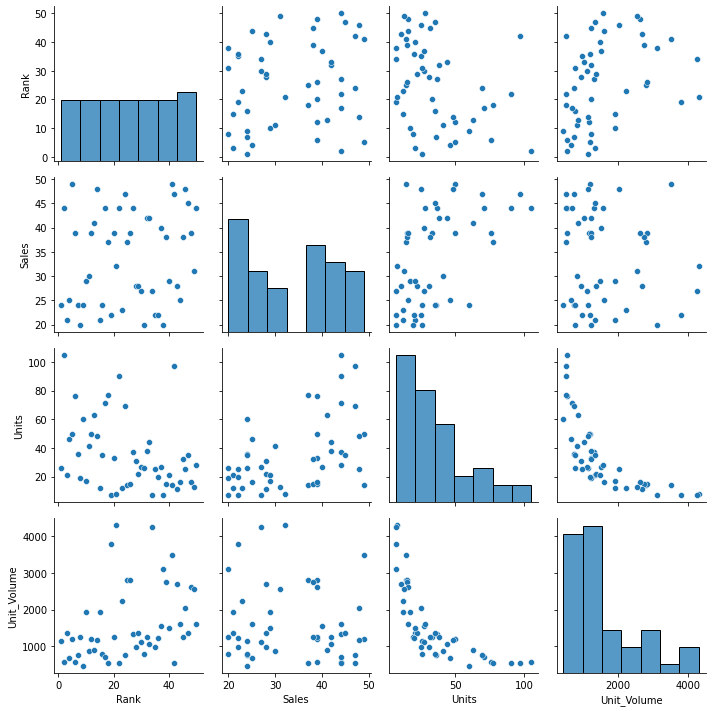

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns 

sns.pairplot(dados) 
plt.tight_layout()

In [92]:
dados.corr() 

,Rank,Sales,Units,Unit_Volume
Rank,1.000000,0.187535,-0.358137,0.359759
Sales,0.187535,1.000000,0.504153,-0.117048
Units,-0.358137,0.504153,1.000000,-0.712994
Unit_Volume,0.359759,-0.117048,-0.712994,1.000000


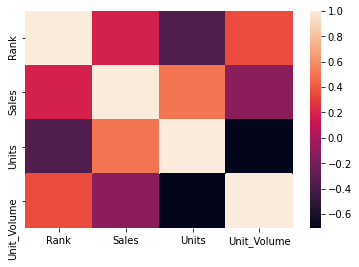

In [79]:
sns.heatmap(dados.corr())

## Ajuste 

In [98]:
from sklearn import  linear_model
from sklearn.metrics import mean_squared_error, r2_score

regr = linear_model.LinearRegression() 

In [114]:
regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)

print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))


Mean squared error: 0.00


In [115]:
print('Variance score: %.2f' % r2_score(y_test, y_pred)) 

Variance score: 1.00


In [116]:
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [-5.04739529e-15  1.00000000e+00  8.20524204e-15  0.00000000e+00]
